<a href="https://colab.research.google.com/github/filipesartori/Inteligencia-Artificial/blob/main/Rede_Neural_Convolucional_Simpsons_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural Convolucional 

## Bibliotecas

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
tf.__version__

'2.6.0'

## Imagens 

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
path = '/content/drive/MyDrive/personagens.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

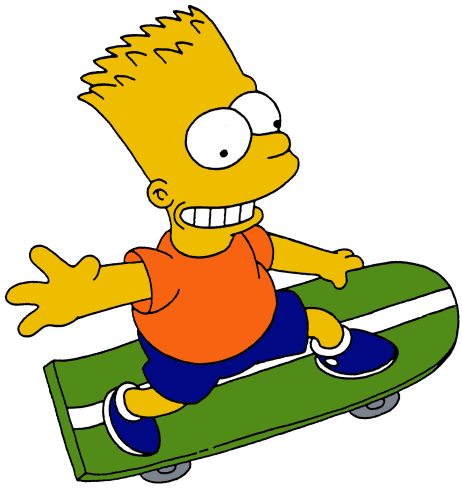

In [21]:
tf.keras.preprocessing.image.load_img(r'/content/test_set/bart/bart13.bmp')

## Base de dados

In [22]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip=True,
                                         zoom_range = 0.2)
base_treinamento = gerador_treinamento.flow_from_directory('/content/training_set',
                                                           target_size= (64, 64),
                                                           batch_size = 8,
                                                           class_mode = 'categorical')

Found 196 images belonging to 2 classes.


In [23]:
gerador_teste = ImageDataGenerator(rescale = 1./2552)
base_teste = gerador_treinamento.flow_from_directory('/content/test_set',
                                                     target_size= (64, 64),
                                                     batch_size = 8,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 73 images belonging to 2 classes.


## Rede neural

In [29]:
rede_neural = Sequential()
rede_neural.add(Conv2D(32, (3,3), input_shape = (64, 64,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(32, (3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 2, activation='softmax'))

In [30]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy',
                    metrics = ['accuracy'])

In [32]:
rede_neural.fit_generator(base_treinamento, epochs=100, validation_data=base_teste)

Epoch 1/100
 2/25 [=>............................] - ETA: 1s - loss: 0.4479 - accuracy: 0.8750

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


25/25 [==============================] - 2s 61ms/step - loss: 0.3504 - accuracy: 0.8776 - val_loss: 0.4023 - val_accuracy: 0.8493
Epoch 2/100
25/25 [==============================] - 2s 61ms/step - loss: 0.3371 - accuracy: 0.8827 - val_loss: 0.3774 - val_accuracy: 0.8219
Epoch 3/100
25/25 [==============================] - 1s 59ms/step - loss: 0.3236 - accuracy: 0.9031 - val_loss: 0.4435 - val_accuracy: 0.8219
Epoch 4/100
25/25 [==============================] - 1s 60ms/step - loss: 0.3506 - accuracy: 0.8878 - val_loss: 0.3539 - val_accuracy: 0.8493
Epoch 5/100
25/25 [==============================] - 1s 59ms/step - loss: 0.3085 - accuracy: 0.9184 - val_loss: 0.3145 - val_accuracy: 0.8904
Epoch 6/100
25/25 [==============================] - 1s 59ms/step - loss: 0.3070 - accuracy: 0.8980 - val_loss: 0.3457 - val_accuracy: 0.8630
Epoch 7/100
25/25 [==============================] - 1s 59ms/step - loss: 0.2911 - accuracy: 0.9031 - val_loss: 0.3299 - val_accuracy: 0.8904
Epoch 8/100
25/25 

## Avaliação

In [33]:
previsoes = rede_neural.predict(base_teste)
previsoes

array([[1.00000000e+00, 9.30848636e-15],
       [1.00000000e+00, 4.10599814e-15],
       [1.00000000e+00, 5.13811597e-11],
       [1.00000000e+00, 1.97740437e-16],
       [1.00000000e+00, 1.26996260e-14],
       [1.00000000e+00, 2.07128846e-14],
       [9.98134851e-01, 1.86513388e-03],
       [1.00000000e+00, 2.22377303e-12],
       [9.99999642e-01, 3.59364179e-07],
       [7.47731850e-02, 9.25226867e-01],
       [9.56774533e-01, 4.32254858e-02],
       [7.51341760e-01, 2.48658270e-01],
       [5.43475389e-01, 4.56524640e-01],
       [1.00000000e+00, 1.75551015e-11],
       [9.89711642e-01, 1.02883149e-02],
       [9.99986291e-01, 1.37657462e-05],
       [9.99662995e-01, 3.36987199e-04],
       [1.00000000e+00, 2.83495469e-16],
       [5.41539848e-01, 4.58460182e-01],
       [8.90520990e-01, 1.09478980e-01],
       [9.99960423e-01, 3.96073046e-05],
       [1.00000000e+00, 1.86157152e-24],
       [7.49413788e-01, 2.50586182e-01],
       [1.00000000e+00, 6.62706556e-09],
       [1.000000

In [34]:
import numpy as np
previsoes2 = np.argmax(previsoes, axis= 1)
previsoes2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1])

In [36]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes2, base_teste.classes)

0.9315068493150684

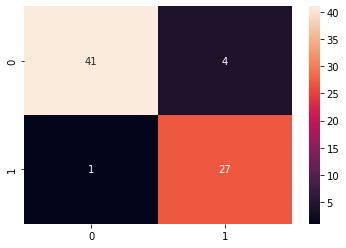

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(previsoes2, base_teste.classes)
sns.heatmap(cm, annot=True)